## perform stat annotation on the cell type composition plots generated in notebook C4

In [1]:
import pandas as pd
import seaborn as sn 
from matplotlib import pyplot as plt
import sys
import numpy as np

In [2]:
#import scanpy as sc

In [3]:
from statannotations.Annotator import Annotator

## load data

In [4]:
group_count_df2 = pd.read_csv( "./cell_type_composition_pct.csv", header = 0, index_col= 0)
group_count_df2.head(2)

,sample,cell_type,count,pct,condition
0,10868_1,ABS,525,0.321691,WT
1,10868_1,EE,19,0.011642,WT


In [11]:
group_count_df2['condition'].unique()

array(['WT', 'Mtgr1 -/-'], dtype=object)

In [6]:
treatment_color = ['#1f77b4', '#ff7f0e'] # for mut and WT order

## plot without stat annotation

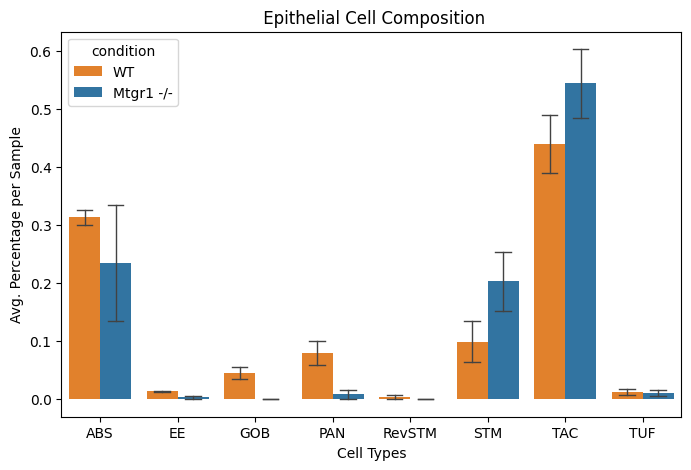

In [9]:
f,ax = plt.subplots(figsize = [8,5])
sn.barplot( data = group_count_df2, x = 'cell_type', y = 'pct', hue = 'condition',
            ci='sd',
           errwidth=1, capsize = 0.2, 
           hue_order=['WT', 'Mtgr1 -/-'], palette=treatment_color[::-1],
           ax = ax, )
t= ax.set_ylabel( "Avg. Percentage per Sample")
t= ax.set_xlabel( "Cell Types")
t = ax.set_title(" Epithelial Cell Composition")
loc, lab = plt.xticks()

In [13]:
group_count_df2['cell_type'].unique()

array(['ABS', 'EE', 'GOB', 'PAN', 'RevSTM', 'STM', 'TAC', 'TUF'],
      dtype=object)

## plot with annotation

In [14]:
# generate pair tuples
# pairs=[(('ABS', 'Mtgr1 -/-'), ('WT', 'Mtgr1 -/-')),]
ct = list( group_count_df2['cell_type'].unique())
cond = ['WT', 'Mtgr1 -/-']
res_pair = []
for i in range( len( ct)):

    tup1 = ( ct[i], cond[0] )
    tup2 = ( ct[i], cond[1] )
    res_pair.append( ( tup1, tup2 ) )
        

In [15]:
res_pair

[(('ABS', 'WT'), ('ABS', 'Mtgr1 -/-')),
 (('EE', 'WT'), ('EE', 'Mtgr1 -/-')),
 (('GOB', 'WT'), ('GOB', 'Mtgr1 -/-')),
 (('PAN', 'WT'), ('PAN', 'Mtgr1 -/-')),
 (('RevSTM', 'WT'), ('RevSTM', 'Mtgr1 -/-')),
 (('STM', 'WT'), ('STM', 'Mtgr1 -/-')),
 (('TAC', 'WT'), ('TAC', 'Mtgr1 -/-')),
 (('TUF', 'WT'), ('TUF', 'Mtgr1 -/-'))]

In [30]:
# not using Mann-Whitney U because the cell type composition should be parametric 

# f,axs = plt.subplots(  figsize = [8,5])
# sn.set(font_scale=1)


# x = 'cell_type'
# y = 'pct'
# data = group_count_df2
# order = ['ABS', 'EE', 'GOB', 'PAN', 'RevSTM', 'STM', 'TAC', 'TUF']
# hue_order = ['WT', 'Mtgr1 -/-']


# sn.barplot( data = data, x = x, y = y, hue = 'condition',
#             ci='sd',
#            errwidth=1, capsize = 0.2, 
#            hue_order=['WT', 'Mtgr1 -/-'], palette=treatment_color[::-1],
#            ax = axs, )

# t= axs.set_ylabel( "Avg. Percentage per Sample")
# t= axs.set_xlabel( "Cell Types")
# t = axs.set_title(" Epithelial Cell Composition")
# #ax1.set_ylabel(y)

# pairs=res_pair
# annotator = Annotator(axs,  pairs, data=data, x=x, y=y,hue = 'condition')
# annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
# annotator.apply_and_annotate()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

EE_WT vs. EE_Mtgr1 -/-: t-test independent samples, P_val:2.253e-02 t=4.343e+00
ABS_WT vs. ABS_Mtgr1 -/-: t-test independent samples, P_val:3.694e-01 t=1.054e+00
GOB_WT vs. GOB_Mtgr1 -/-: t-test independent samples, P_val:1.816e-02 t=4.705e+00
PAN_WT vs. PAN_Mtgr1 -/-: t-test independent samples, P_val:3.668e-02 t=3.603e+00
RevSTM_WT vs. RevSTM_Mtgr1 -/-: t-test independent samples, P_val:4.950e-01 t=7.746e-01
STM_WT vs. STM_Mtgr1 -/-: t-test independent samples, P_val:1.271e-01 t=-2.095e+00
TAC_WT vs. TAC_Mtgr1 -/-: t-test independent samples, P_val:1.980e-01 t=-1.648e+00
TUF_WT vs. TUF_Mtgr1 -/-: t-test independent samples, P_val:7.642e-01 t=3.283e-01


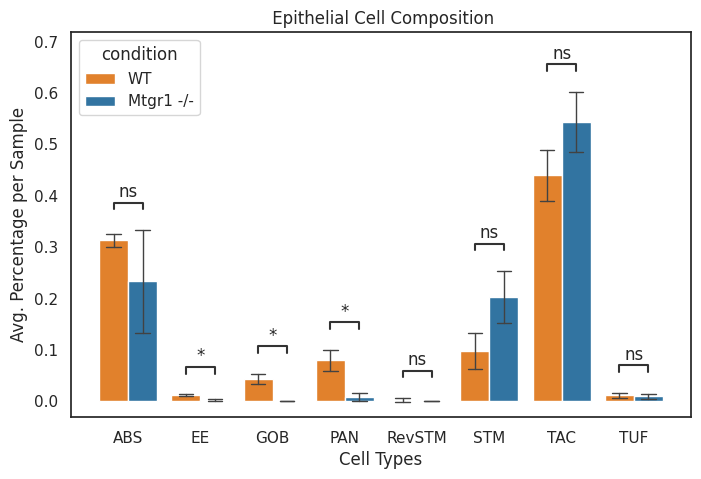

In [29]:
f,axs = plt.subplots(  figsize = [8,5])
sn.set(font_scale=1)
sn.set_theme(style='white')


x = 'cell_type'
y = 'pct'
data = group_count_df2
order = ['ABS', 'EE', 'GOB', 'PAN', 'RevSTM', 'STM', 'TAC', 'TUF']
hue_order = ['WT', 'Mtgr1 -/-']


sn.barplot( data = data, x = x, y = y, hue = 'condition',
            ci='sd',
           errwidth=1, capsize = 0.2, 
           hue_order=['WT', 'Mtgr1 -/-'], palette=treatment_color[::-1],
           ax = axs, )

t= axs.set_ylabel( "Avg. Percentage per Sample")
t= axs.set_xlabel( "Cell Types")
t = axs.set_title(" Epithelial Cell Composition")
#ax1.set_ylabel(y)

pairs=res_pair
annotator = Annotator(axs,  pairs, data=data, x=x, y=y,hue = 'condition')
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()
sn.set_theme(style='white')